In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import AgglomerativeClustering

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt


In [2]:
data_df = pd.read_csv("shopping_data.csv")
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.1+ KB


In [3]:
data_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Categorical to numeric encoding.
encoder = LabelEncoder()
encoder.fit(data_df.Genre)
data_df.Genre = encoder.transform(data_df.Genre)

In [5]:
data = data_df.drop(columns=['CustomerID', 'Age'])
data.head()

,Genre,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,1,15,81
2,0,16,6
3,0,16,77
4,0,17,40


### Identifying number of clusters needed.

In [6]:
import scipy.cluster.hierarchy as sch

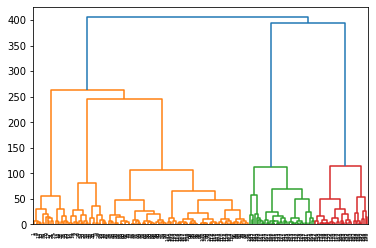

In [7]:
sch.dendrogram(sch.linkage(data, method="ward"))
plt.show()

### Dendogram helped us to decide we need 5 Clusters

In [8]:
# Function to Train and return predicted labels
def AggloClusterer(data, cluster, verbose=False):
    agglo = AgglomerativeClustering(n_clusters=cluster)
    labels_predicted = agglo.fit_predict(data)
    if(verbose):
        print("Predicted labels: ",labels_predicted)
        print("Unique Predicted labels: ",np.unique(labels_predicted))
    return labels_predicted

## Lets scatter plot for better understanding.

In [9]:
def ScaterCluster(data, labels, FirstFeature, SecondFeature):
    fig, ax = plt.subplots(figsize=(8,5))
    for i in np.unique(labels):
        plt.scatter(data[labels==i][FirstFeature],data[labels==i][SecondFeature])
#         plt.scatter(data[labels==i].iloc[:,2:3],data[labels==i].iloc[:,3:4])
    ax.set_xlabel(FirstFeature)
    ax.set_ylabel(SecondFeature)
    plt.show()

In [10]:
y_predicted = AggloClusterer(data, 5, True)

Predicted labels:  [4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]
Unique Predicted labels:  [0 1 2 3 4]


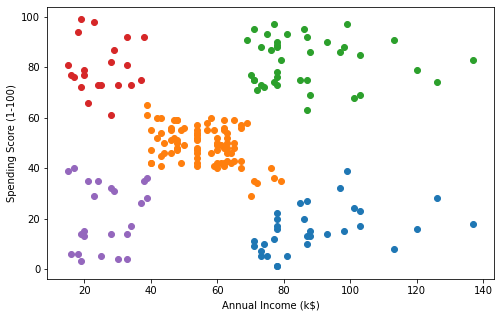

In [11]:
ScaterCluster(data, y_predicted,'Annual Income (k$)', 'Spending Score (1-100)')

##  We can see clearly that clusters perfect and not overlapping, we have created perfect clusters.

## Lets create data for Future reference or to use in Supervised Learning.

In [12]:
data_df['Genre'] = encoder.inverse_transform(data_df['Genre'])

In [13]:
data_df['Target'] = y_predicted
data_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Target
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [14]:
data_df.to_csv("precessed_shopping_data.csv", index=False)

#### Validating saved data in CSV file.

In [15]:
precessed_data = pd.read_csv("precessed_shopping_data.csv")
precessed_data.sample(n=5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Target
53,54,Male,59,43,60,1
43,44,Female,31,39,61,1
17,18,Male,20,21,66,3
97,98,Female,27,60,50,1
7,8,Female,23,18,94,3
